In [1]:
import pandas as pd
import seaborn as sns

In [35]:
df = pd.read_csv("House_Rent_Dataset.csv")

In [36]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [37]:
df=df.drop(columns=["Floor","Area Type","Area Locality","City","Point of Contact","Posted On"])

In [80]:
df.rename(columns={'Bathroom': 'Bedroom'}, inplace=True)

In [81]:
print(df)

      BHK   Rent  Size  Furnishing Status  Tenant Preferred  Bedroom
0       2  10000  1100                  0                 0        2
1       2  20000   800                  1                 0        1
2       2  17000  1000                  1                 0        1
3       2  10000   800                  0                 0        1
4       2   7500   850                  0                 1        1
...   ...    ...   ...                ...               ...      ...
4741    2  15000  1000                  1                 0        2
4742    3  29000  2000                  1                 0        3
4743    3  35000  1750                  1                 0        3
4744    3  45000  1500                  1                 2        2
4745    2  15000  1000                  0                 1        2

[4746 rows x 6 columns]


In [82]:
df.head()

,BHK,Rent,Size,Furnishing Status,Tenant Preferred,Bedroom
0,2,10000,1100,0,0,2
1,2,20000,800,1,0,1
2,2,17000,1000,1,0,1
3,2,10000,800,0,0,1
4,2,7500,850,0,1,1


<Axes: ylabel='BHK'>

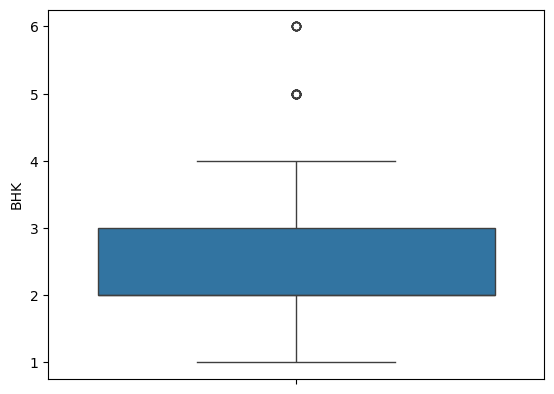

In [6]:
sns.boxplot(df["BHK"])


In [7]:
# upper_limit = Q3+1.5*IQR
# lower_limit = Q1-1.5*IQR
# IQR = Q3-Q1
Q3 = df.describe()["BHK"]["75%"]
Q1 = df.describe()["BHK"]["25%"]

In [8]:
Q3

np.float64(3.0)

In [9]:
Q1

np.float64(2.0)

In [10]:
IQR = Q3-Q1

In [11]:
IQR

np.float64(1.0)

In [12]:
upper_limit = Q3+1.5*IQR

In [13]:
lower_limit = Q1-1.5*IQR

In [16]:
df["BHK"]=df["BHK"].clip(upper_limit,lower_limit)

<Axes: ylabel='BHK'>

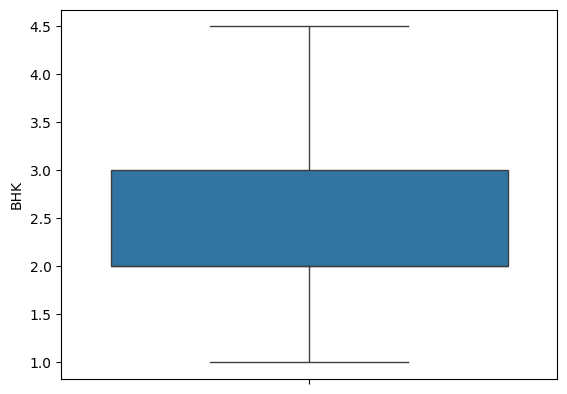

In [24]:
sns.boxplot(df["BHK"])

In [83]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Furnishing Status', 'Tenant Preferred',
       'Bedroom'],
      dtype='object')

In [84]:
df["Furnishing Status"].value_counts()

Furnishing Status
1    2251
0    1815
2     680
Name: count, dtype: int64

In [41]:
F = {"Unfurnished":0,"Semi-Furnished":1,"Furnished":2}

In [42]:
df["Furnishing Status"]=df["Furnishing Status"].map(F)

In [43]:
df["Furnishing Status"].value_counts()

Furnishing Status
1    2251
0    1815
2     680
Name: count, dtype: int64

In [44]:
df["Tenant Preferred"].value_counts()

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64

In [45]:
T = {"Bachelors/Family":0,"Bachelors":1,"Family":2}
df["Tenant Preferred"]=df["Tenant Preferred"].map(T)

In [46]:
df["Tenant Preferred"].value_counts()

Tenant Preferred
0    3444
1     830
2     472
Name: count, dtype: int64

In [85]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Furnishing Status', 'Tenant Preferred',
       'Bedroom'],
      dtype='object')

In [86]:
df["Bedroom"].value_counts()

Bedroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

In [87]:
df.head()

,BHK,Rent,Size,Furnishing Status,Tenant Preferred,Bedroom
0,2,10000,1100,0,0,2
1,2,20000,800,1,0,1
2,2,17000,1000,1,0,1
3,2,10000,800,0,0,1
4,2,7500,850,0,1,1


In [88]:
X = df[["BHK","Size","Furnishing Status","Tenant Preferred","Bedroom"]]
y = df["Rent"]

In [89]:
X.head()

,BHK,Size,Furnishing Status,Tenant Preferred,Bedroom
0,2,1100,0,0,2
1,2,800,1,0,1
2,2,1000,1,0,1
3,2,800,0,0,1
4,2,850,0,1,1


In [90]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [91]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [92]:
print(type(y))

<class 'pandas.core.series.Series'>


In [54]:
%%capture
! pip install scikit-learn

In [55]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [94]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [95]:
lin = LinearRegression()

In [96]:
lin.fit(X_train,y_train)

LinearRegression()

In [97]:
y_pred = lin.predict(X_test)


In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

np.float64(13056768748.57901)

In [99]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [100]:
rmse

np.float64(114266.21875505906)

In [101]:
import joblib
joblib.dump(lin, "Rent.pkl")

['Rent.pkl']

In [102]:
X.columns

Index(['BHK', 'Size', 'Furnishing Status', 'Tenant Preferred', 'Bedroom'], dtype='object')

In [103]:
np.__version__

'2.1.1'

In [66]:
%%capture
pip install streamlit

In [104]:
df.head(1)

,BHK,Rent,Size,Furnishing Status,Tenant Preferred,Bedroom
0,2,10000,1100,0,0,2


In [105]:
df["Size"].value_counts()

Size
1000    240
600     225
800     220
1200    193
500     192
       ... 
67        1
1156      1
2671      1
2352      1
1606      1
Name: count, Length: 615, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   float64
 1   Size               4746 non-null   int64  
 2   Furnishing Status  4746 non-null   object 
 3   Tenant Preferred   4746 non-null   object 
 4   Bedroom            4746 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 185.5+ KB


In [107]:
df["Bedroom"].value_counts()

Bedroom
2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64

In [109]:
df.head(1)

,BHK,Rent,Size,Furnishing Status,Tenant Preferred,Bedroom
0,2,10000,1100,0,0,2
